In [27]:
import tensorflow as tf
import numpy as np

In [28]:
trainX = np.load("trainX.npy")
trainY = np.load("trainY.npy")
testX = np.load("testX.npy")
testY = np.load("testY.npy")

In [29]:
trainX.shape

(240, 10304)

In [30]:
trainY.shape

(240,)

In [31]:
trainX = trainX.reshape(240,112,92,1)
testX = testX.reshape(160,112,92,1)
trainY = tf.keras.utils.to_categorical(trainY, num_classes=20)
testY = tf.keras.utils.to_categorical(testY, num_classes=20)

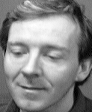

In [17]:
tf.keras.preprocessing.image.array_to_img(trainX[27])

In [19]:
tf.keras.backend.clear_session() 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((112,92,1),input_shape=(112,92,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(16, #Number of filters
                                 kernel_size=(3,3), #Size of the filter 
                                 activation='relu')) 
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 112, 92, 1)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 92, 1)        4         
_________________________________________________________________
conv2d (Conv2D)              (None, 110, 90, 16)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 45, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 55, 45, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 39600)             0         
_________________________________________________________________
dense (Dense)                (None, 20)                7

In [21]:
model.fit(trainX,trainY, validation_data=(testX,testY), epochs=10, batch_size=16)

Epoch 1/10
15/15 [==============================] - 15s 27ms/step - loss: 3.9861 - accuracy: 0.2353 - val_loss: 29.3077 - val_accuracy: 0.1500
Epoch 2/10
15/15 [==============================] - 0s 8ms/step - loss: 0.2746 - accuracy: 0.9567 - val_loss: 26.1498 - val_accuracy: 0.0562
Epoch 3/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0613 - accuracy: 0.9907 - val_loss: 19.9500 - val_accuracy: 0.0688
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 13.2900 - val_accuracy: 0.1250
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 8.8072 - val_accuracy: 0.1937
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 5.7239 - val_accuracy: 0.2688
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 3.7198 - val_accuracy: 0.4187
Epoch 8/10
15/

In [32]:
trainX = np.repeat(trainX[..., np.newaxis], 3, -1)
testX = np.repeat(testX[..., np.newaxis], 3, -1)

In [33]:
trainX.shape

(240, 112, 92, 1, 3)

In [36]:
import numpy as np 
import tensorflow as tf
trainX = np.load("trainX.npy",allow_pickle='TRUE')
trainY = np.load("trainY.npy",allow_pickle='TRUE')
testX = np.load("testX.npy",allow_pickle='TRUE')
testY = np.load("testY.npy",allow_pickle='TRUE')
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
trainY = tf.keras.utils.to_categorical(trainY, num_classes=20)
testY = tf.keras.utils.to_categorical(testY, num_classes=20)
trainX = trainX.reshape(240,112,92)
testX = testX.reshape(160,112,92)
trainX = np.repeat(trainX[..., np.newaxis], 3, -1)
testX = np.repeat(testX[..., np.newaxis], 3, -1)
print(trainX.shape)
print(testX.shape)

(240, 10304)
(240,)
(160, 10304)
(160,)
(240, 112, 92, 3)
(160, 112, 92, 3)


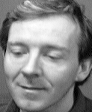

In [37]:
tf.keras.preprocessing.image.array_to_img(trainX[27])

In [38]:
model = tf.keras.applications.resnet50.ResNet50(include_top=False, #Do not include FC layer at the end
                                                input_shape=(112,92, 3),
                                                weights='imagenet')
for layer in model.layers:
    layer.trainable = False

94773248/94765736 [==============================] - 658s 7us/step


In [40]:
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(200,activation='relu')(x)
prediction = tf.keras.layers.Dense(20,activation='softmax')(x) #Using Keras Model class
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer 
                                    outputs=prediction) #Output layer added

In [41]:
final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 112, 92, 3)] 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 118, 98, 3)   0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 56, 46, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 56, 46, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________